# Data Preproccessing

### Importing asset

dalam tahapan ini kita akan melakukan importing untuk library dan dataset yang akan digunakan dalam developing Machine Learning

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
import string
import pandas as pd
import numpy as np

In [300]:
# mengambil dataset
df = pd.read_csv("dataset/INA_TweetsPPKM_Labeled_Pure.csv", sep="\t") 

# menampilkan 10 teratas data
df.head()

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


0 : Positif, 1 : Netral, 2 : Negatif 

In [301]:
# melihat berapa banyak tweet positif dan negatif dan netal
df.sentiment.value_counts()

sentiment
1    17706
2     3980
0     1958
Name: count, dtype: int64

dari di atas, kita bisa melihat bahwa data yang paling banyak adalah data yang netral. Disusul dengan data negatif yang paling banyak tentang tweet ppkm ini. Dan yang paling sedikit adalah tweet yang berisi positif

### Feature Selection

Di dalam tahapan ini kita akan membuang untuk fitur yang tidak akan dipakai. Disini kita memutuskan untuk memakai 2 fitur yaitu Tweet sebagai x dan sentiment sebagai label

In [302]:
# menggunakan fitur yang diperlukan saja
df = df[["Tweet", "sentiment"]]

untuk meringankan dan menyeimbangkan data kita perlu mengambil data dengan masing masing label 1900. Mengapa 1900 karena 1900 dapat memuat semua data positif, kalau lebih dari itu, kita tidak bisa menyeimbangkan data positif.

In [303]:
# untuk mengambil masing2 label 1900 lalu diacak
df = pd.concat([df[df["sentiment"] == 0][:1900], df[df["sentiment"] == 1][:1900], df[df["sentiment"] == 2][:1900]]).sample(frac=1,random_state=123).reset_index()

df.head()

,index,Tweet,sentiment
0,862,Stay safe and healthy gaess! Jangan lupa untuk...,1
1,10257,Merah Putih Terus Berkibar https://t.co/zAp4RD...,0
2,1779,LIST 3 FILM TENTANG HUJAN WAJIB TONTON https:/...,1
3,13914,Selalu patuhi anjuran pemerintah dengan tetap ...,0
4,1312,"Tekan Kenaikan Angka COVID-19, #PPKM Mikro Dib...",1


In [304]:
# df.iloc[31]
df.iloc[30:].head(20)

,index,Tweet,sentiment
30,6745,hayu pesen jen's snack gais...cemilan enak nih...,0
31,5301,Meski #PPKM harus tetap produktiv dong \n Ini ...,0
32,6043,Gimana mau bayar pajak bu kita aja di bikin su...,2
33,653,"Kota Bandung saat ini PPKM level 3?\nLalu, bag...",1
34,7367,Enaknya ngapain yah? #ppkm,2
35,1192,Bagus sekali Jenderal Kalau seperti ini lebih ...,1
36,12522,"Ohhh ternyata yg dilanjut PPKM , hubungan kita...",2
37,19945,Nah buat kamu yang mau berkegiatan selama PPKM...,0
38,7575,🗣: 17 agustus ntar kemana nih? Tempat hiburan/...,0
39,4814,❕PAMERAN VIRTUAL 360° YANG PALING DITUNGGU ❕ \...,0


### Duplicated Data

di dalam tahapan ini kita akan memeriksa apakah ada data yang terduplikasi. Jika iya, maka kita perlu memakai salah satu dari duplikasi tersebut dan menghilangkan yang lainnya. Ini difungsikan agar model tidak belajar pada data yang sama secara berulang ulang, karena hal ini berpotensi terjadinya overfitting.

In [305]:
# untuk menampilkan data yang  terduplikasi
df[df.duplicated()]

,index,Tweet,sentiment


hasil tabel di atas menunjukkan ada beberapa data yang terduplikasi. Maka kita pelu menggunakan salah satunya saja

In [306]:
# untuk menghilangkan data yang terduplikasi
df.drop_duplicates(inplace=True)

# untuk menampilkan data yang terduplikasi
df[df.duplicated()]

,index,Tweet,sentiment


Jika tidak ditemukan data yang terduplikasi, maka akan tampak seperti di atas. Akan menghasilkan tabel yang kosong

### Missing Value 

Sekarang kita perlu menghilangkan data yang hilang nilainya. Bertujuan agar tidak terjadi error ketika melakukan modeling

In [307]:
# untuk menampilkan data hilang jenis "Nan"
df.isna().sum()

index        0
Tweet        0
sentiment    0
dtype: int64

In [308]:
# untuk menampilkan data hilang jenis "Null"
df.isnull().sum()

index        0
Tweet        0
sentiment    0
dtype: int64

dan untuk memastikan bahwa label tidak ada yang kosong, kita perlu melihat value unik dari labelnya / sentiment. Seharusnya akan mempunyai 3 nilai unik yaitu 0, 1, dan 2

In [309]:
# menampilkan nilai unik data sentiment
df["sentiment"].unique()

array([1, 0, 2], dtype=int64)

### Train Test Split

Lalu pada tahapan ini kita perlu memisahkan antara data yang akan digunakan untuk proses train (data train) dan data yang akan digunakan untuk testing (data testing). Lalu mengapa sebelum case folding dan lain lain ? Karena dalam deploy input yang sebenarnya adalah kalimat. Jadi di model ini kita perlu mlakukan perhitungan ulang.

In [310]:
def Train_Test_Split(x, y, random_seed=None, test_size=0.2):
    n = len(x)
    if random_seed:
        np.random.seed(random_seed)
 
    test_size = int(test_size*n)
    indices = np.random.permutation(n)
    train_indices, test_indices = indices[test_size:], indices[:test_size]
    return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

x = df["Tweet"]
y = df["sentiment"]

X_train, X_test, y_train, y_test =Train_Test_Split(x, y, random_seed=42, test_size=0.2)

X_train


43      Salah satu yang menyebabkan pembatalan ini men...
1891    Presiden Jokowi minta Menko Luhut Binsar Pandj...
3195    Ppkm aja di perpanjang masa hubungan kita udah...
3442    Hidup model apa sih ini. Gua kangen masa nongk...
4991    4) pengaturan teknis angka 1) sampai dengan an...
                              ...                        
3772    Dua Lebih Hemat!\n\nGuys jangan lewatkan promo...
5191    STICKER CERMIN OVAL 3D STIKER DINDING Kaca Acr...
5226    Meskipun #DirumahAja, terus kobarkan semangat ...
5390                              #ppkm pie pie kok mawut
860     Buat yang masih harus masuk kerja ke kantor, j...
Name: Tweet, Length: 4560, dtype: object

### Case Folding

pada tahapan ini kita akn menghilangkan karakter karakter yang tidak penting seperti tag, hastag, link, dan lain lain. Tahapan ini juga kita akan memperkecil semua huruf agar tidak memiliki makna ganda 

In [311]:
def case_folding(text):
    # untuk menghilangkan tag atau yang memiliki karakter @
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)

    # untuk menghilangkan hastag / tagar
    text = re.sub(r"#\w+", "", text)

    # untuk menghilangkan element angka
    text = re.sub(r"\d+", "", text)

    # untuk menghilangan RT pada tweet
    text = re.sub(r"RT[\s]+", "", text)

    # untuk menghilangkan link
    text = re.sub(r"https?://\S+", "", text)

    # untuk menghilangkan enter
    text = re.sub(r"\n+", "", text)

    # menghilangkan emoji dan simbol
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                               u"\U0001F680-\U0001F6FF"  # transportasi & simbol map
                               u"\U00010000-\U0010ffff" 
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    # untuk menghilangkan simbol simbol
    text = text.translate(str.maketrans("", "", string.punctuation))

    return text

# mengimplementasikan pada setiap dokumen
X_train = X_train.apply(case_folding).str.lower()
X_train

43      salah satu yang menyebabkan pembatalan ini men...
1891    presiden jokowi minta menko luhut binsar pandj...
3195    ppkm aja di perpanjang masa hubungan kita udahan 
3442    hidup model apa sih ini gua kangen masa nongkr...
4991     pengaturan teknis angka  sampai dengan angka ...
                              ...                        
3772    dua lebih hematguys jangan lewatkan promo dari...
5191    sticker cermin oval d stiker dinding kaca acry...
5226    meskipun  terus kobarkan semangat kemerdekaan ...
5390                                    pie pie kok mawut
860     buat yang masih harus masuk kerja ke kantor ja...
Name: Tweet, Length: 4560, dtype: object

In [312]:
# menampilkan sebelum case folding
df.loc[36].Tweet

'Ohhh ternyata yg dilanjut PPKM , hubungan kita engga ..🤔\n\n#PPKM Diperpanjang'

In [313]:
# menampilkan setelah case folding
X_train.loc[36]

'ohhh ternyata yg dilanjut ppkm  hubungan kita engga  diperpanjang'

### Tokenize

Dalam tahapan ini, kita akan memisahkan sebuah kalimat menjadi per kata untuk menjadikan kata tersebut sebagai atribut x. Jadi atribut tersebut dapat lebih jelas dan dapat diproses oleh model machine learning

In [314]:
# memisahkannya dengan nltk
def tokenize(text):
    return word_tokenize(text)

# mengimplementasikannya untuk setiap dokumen
X_train = X_train.apply(tokenize)
X_train

43      [salah, satu, yang, menyebabkan, pembatalan, i...
1891    [presiden, jokowi, minta, menko, luhut, binsar...
3195    [ppkm, aja, di, perpanjang, masa, hubungan, ki...
3442    [hidup, model, apa, sih, ini, gua, kangen, mas...
4991    [pengaturan, teknis, angka, sampai, dengan, an...
                              ...                        
3772    [dua, lebih, hematguys, jangan, lewatkan, prom...
5191    [sticker, cermin, oval, d, stiker, dinding, ka...
5226    [meskipun, terus, kobarkan, semangat, kemerdek...
5390                               [pie, pie, kok, mawut]
860     [buat, yang, masih, harus, masuk, kerja, ke, k...
Name: Tweet, Length: 4560, dtype: object

### Stopwords


Dalam tahapan ini kita akan membuat agar kata kata yang maknanya dependen (tidak berdiri sendiri), Seperti kata hubung, kata sifat, dan lain lain akan dihilangkan. Karena pada tahap tokenize sudah dipindahkan menjadi perkata. Maka kata tersebut harus independen maknanya.  

In [315]:
stopword_remover = StopWordRemoverFactory()
arr = stopword_remover.create_stop_word_remover()
print(stopword_remover.get_stop_words())

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [316]:
# factory / object yang akan membuat stopword
stopword_remover = StopWordRemoverFactory()

# fungsinya yang akan mengembalikan document yang sudah di stopword
def stopword(text):
    return [word for word in text if word not in stopword_remover.get_stop_words()]

# mengimplementasikan pada setiap dokumen
X_train = X_train.apply(stopword)
X_train

43      [salah, satu, menyebabkan, pembatalan, tito, k...
1891    [presiden, jokowi, minta, menko, luhut, binsar...
3195      [ppkm, aja, perpanjang, masa, hubungan, udahan]
3442    [hidup, model, apa, sih, gua, kangen, masa, no...
4991    [pengaturan, teknis, angka, angka, diatur, pem...
                              ...                        
3772    [lebih, hematguys, jangan, lewatkan, promo, mc...
5191    [sticker, cermin, oval, d, stiker, dinding, ka...
5226    [meskipun, terus, kobarkan, semangat, kemerdek...
5390                               [pie, pie, kok, mawut]
860     [buat, masuk, kerja, kantor, jangan, lengah, s...
Name: Tweet, Length: 4560, dtype: object

### Stemming

Dalam tahapan ini, kita akan membuat agar semua kata yang memiliki imbuhan untuk dijadikan kata aslinya. Misal Memasak menjadi masak, Penyanyi menjadi nyanyi, Membalap menjadi balap. Tujuannya adalah agar menjadikan kata tersebut menjadi makna yang benar benar dasar.

In [317]:
# menyiapkan stemmer 
stemmer = StemmerFactory().create_stemmer()

# menyiapkan function yang akan mengembalikan document yang sudah di stem
def stemming(text):
    return [stemmer.stem(word) for word in text]

# mengimplementasikan pada setiap dokumen
X_train = X_train.apply(stemming)

# membuat copy an untuk berjaga jaga
X_train_copy = X_train.copy()

In [338]:
# untuk menyimpan ke csv, agar tidak dilakukan stemming terus menerus
X_train = pd.DataFrame(X_train)

X_train.to_csv("stem.csv", index=False)

X_train["Tweet"].iloc[0][0]

'salah'

In [364]:
# mengambul X_train untuk mengupdate
X_train = pd.read_csv("stem.csv")["Tweet"].apply(lambda x: x.replace("'", "").strip("][").split(", "))

X_train

0       [salah, satu, sebab, batal, tito, karnavian, d...
1       [presiden, jokowi, minta, menko, luhut, binsar...
2              [ppkm, aja, panjang, masa, hubung, udahan]
3       [hidup, model, apa, sih, gua, kangen, masa, no...
4       [atur, teknis, angka, angka, atur, perintah, d...
                              ...                        
4555    [lebih, hematguys, jangan, lewat, promo, mcdon...
4556    [sticker, cermin, oval, d, stiker, dinding, ka...
4557    [meski, terus, kobar, semangat, merdeka, kobar...
4558                               [pie, pie, kok, mawut]
4559    [buat, masuk, kerja, kantor, jangan, lengah, s...
Name: Tweet, Length: 4560, dtype: object

# Pembobotan Kata

### Analisa dengan wordcloud


dalam tahapan ini, kita akan menganalisa kata apa yang sering muncul di tweet positif dan kata apa yang sering muncul di tweet negatif

In [365]:
# mengcopy data train x
labeled_data = X_train.copy()

# melabeli setiap item
labeled_data["Labels"] = y_train.apply(lambda x: int(x))

labeled_data.head()

,Tweet,Labels
43,"[salah, satu, sebab, batal, tito, karnavian, d...",2
1891,"[presiden, jokowi, minta, menko, luhut, binsar...",1
3195,"[ppkm, aja, panjang, masa, hubung, udahan]",2
3442,"[hidup, model, apa, sih, gua, kangen, masa, no...",0
4991,"[atur, teknis, angka, angka, atur, perintah, d...",1


berikut untuk kata kata yang sering muncul di tweet positif

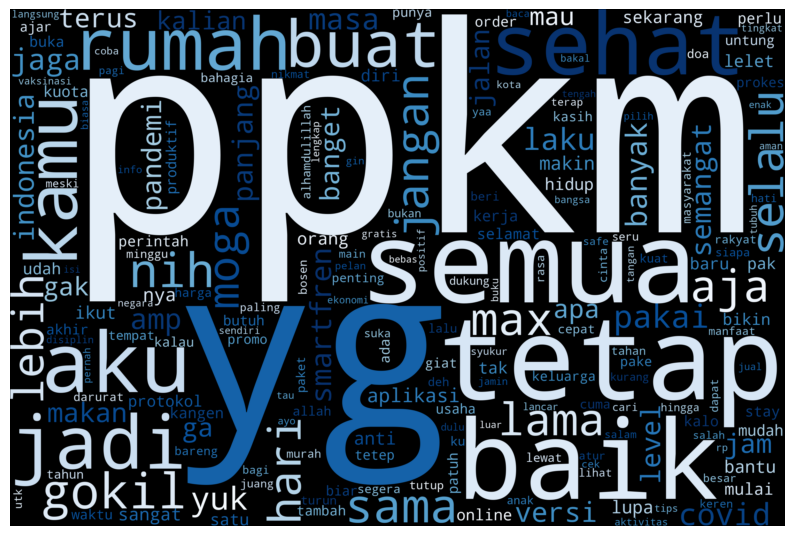

In [373]:
# untuk menampilkan wordcloud
def showwordcloud(wordc):
    plt.figure(figsize=(10,8)) # meetukan figure
    plt.axis("off") 
    plt.imshow(wordc, interpolation='bilinear')
    plt.show()

# menyiapkan untuk semua kata yang akan dicari word cloud nya pada tweet positif
all_words = "".join([str(word).replace("'", "") for word in labeled_data.Tweet[labeled_data.Labels == 0]])

# melakukan setting pada ukuran dan option lainnya 
word_cloud = WordCloud(
    width=3000, # lebar
    height=2000, # tinggi
    random_state=3, # keacakan dg seed
    colormap="Blues_r", # berwarna cenderung biru
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# menampilkan word cloud
showwordcloud(word_cloud)

berikut kata kata yang sering muncul di tweet negatif

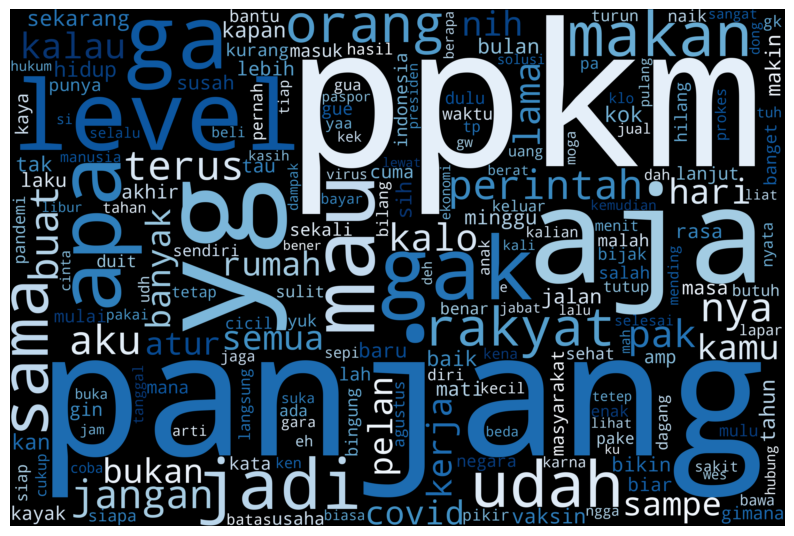

In [374]:
# untuk menampilkan wordcloud
def showwordcloud(wordc):
    plt.figure(figsize=(10,8)) # meetukan figure
    plt.axis("off") 
    plt.imshow(wordc, interpolation='bilinear')
    plt.show()

# menyiapkan untuk semua kata yang akan dicari word cloud nya pada tweet negatif
all_words = "".join([str(word).replace("'", "") for word in labeled_data.Tweet[labeled_data.Labels == 2]])

# melakukan setting pada ukuran dan option lainnya 
word_cloud = WordCloud(
    width=3000, # lebar
    height=2000, # tinggi
    random_state=3, # keacakan dg seed
    colormap="Blues_r", # berwarna cenderung biru
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# menampilkan word cloud
showwordcloud(word_cloud)

sangat jelas kalau kata kata sering muncul pada tweet positif yaitu kata kata untuk mengingatkan dan menyadarkan orang lain tentang pentingnya manjaga diri di saat covid. Dan di kata kata sering muncul pada tweet negatif yaitu kata kata keluhan, penolakan. Dan jelas juga kalau pada kedua tweet tersebut muncul kata ppkm jadi nantinya kita perlu hapus kata itu karena tidak terlalu memilki pola 

berikut adalah kata kata yang sering muncul pada tweet netral

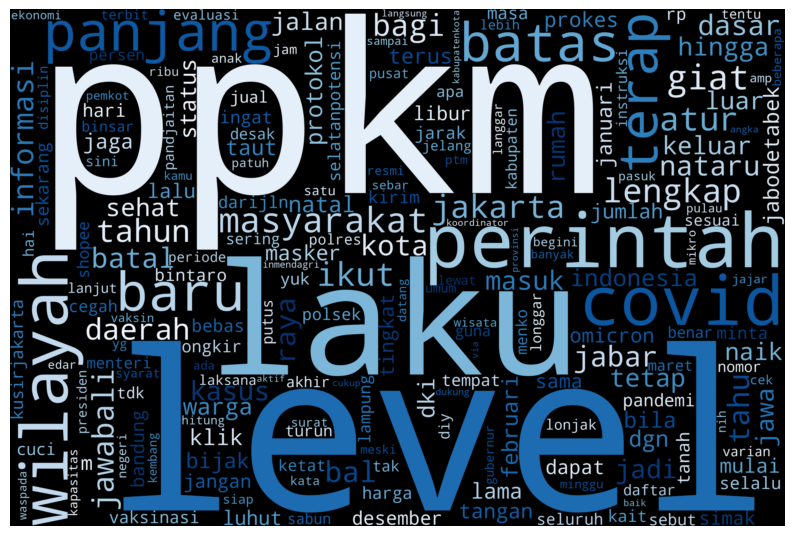

In [375]:
# untuk menampilkan wordcloud
def showwordcloud(wordc):
    plt.figure(figsize=(10,8)) # meetukan figure
    plt.axis("off") 
    plt.imshow(wordc, interpolation='bilinear')
    plt.show()

# menyiapkan untuk semua kata yang akan dicari word cloud nya pada tweet netral
all_words = "".join([str(word).replace("'", "") for word in labeled_data.Tweet[labeled_data.Labels == 1]])

# melakukan setting pada ukuran dan option lainnya 
word_cloud = WordCloud(
    width=3000, # lebar
    height=2000, # tinggi
    random_state=3, # keacakan dg seed
    colormap="Blues_r", # berwarna cenderung biru
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# menampilkan word cloud
showwordcloud(word_cloud)

sangat jelas kebanyakan tweet netral berisi tentang berita covid-19 atau ppkm. Karena banyak wilayah, tanggal / bulan, kata kata formal yang di sebut

### Frequency Word On Document

### Term Frequency

### Inverse Document Frequency

### TF - IDF

### Feature Selection

# Modeling

### Create Class

### Training

### Testing

### Conclusion